<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/HousePriceEstimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1745]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix, f1_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import PowerTransformer, Normalizer, StandardScaler,RobustScaler,MinMaxScaler,RobustScaler
from scipy.stats import kstest,ks_2samp,shapiro, boxcox, yeojohnson
from datetime import datetime

# Cargando la data


In [1746]:
df = pd.read_csv("train.csv")
dfe=pd.read_csv("Evaluation.csv")

In [1747]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,16935,335000.0,2,1.75,1060,1202,2.0,0,bad,acceptable,7,760,300,2003,0,98136,47.5426,-122.388,1060,1493
1,499,437500.0,3,2.50,2120,4500,2.0,0,bad,acceptable,7,2120,0,2000,0,98065,47.5322,-121.880,2530,4816
2,14192,1005000.0,3,2.50,2570,5000,1.0,0,bad,good,8,1480,1090,1940,0,98105,47.6578,-122.285,2420,5484
3,5666,1600000.0,3,2.50,2850,19593,1.5,1,fantastic,acceptable,10,1790,1060,1978,0,98008,47.5894,-122.111,2850,18782
4,11015,186000.0,3,1.75,1460,7967,1.0,0,bad,acceptable,7,1040,420,1977,0,98023,47.3199,-122.374,1460,6835


In [1748]:
dfe.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,14697,4,2.50,2700,8810,2.0,0,bad,acceptable,9,2700,0,2004,0,98052,47.7041,-122.116,2730,5100
1,1217,5,3.25,4110,7920,2.0,0,great,acceptable,9,3150,960,1921,0,98122,47.6170,-122.282,3890,7800
2,10447,3,2.00,2500,4080,1.5,0,bad,excellent,7,1680,820,1922,0,98103,47.6813,-122.346,1550,3060
3,18727,2,0.75,900,3527,1.0,0,bad,acceptable,6,900,0,1939,0,98146,47.5083,-122.336,1220,4080
4,10207,3,2.00,2210,6387,1.0,0,bad,acceptable,8,2210,0,2003,0,98003,47.2650,-122.302,2570,6497


# Identificando valores nulos


In [1749]:
def display_missing_value(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()),'. (',(df[col].isnull().sum()/df.shape[0])*100,'%)')
    print('\n')

In [1750]:
display_missing_value(df)

id column missing values: 0 . ( 0.0 %)
price column missing values: 0 . ( 0.0 %)
bedrooms column missing values: 0 . ( 0.0 %)
bathrooms column missing values: 0 . ( 0.0 %)
sqft_living column missing values: 0 . ( 0.0 %)
sqft_lot column missing values: 0 . ( 0.0 %)
floors column missing values: 0 . ( 0.0 %)
waterfront column missing values: 0 . ( 0.0 %)
view column missing values: 0 . ( 0.0 %)
condition column missing values: 0 . ( 0.0 %)
grade column missing values: 0 . ( 0.0 %)
sqft_above column missing values: 0 . ( 0.0 %)
sqft_basement column missing values: 0 . ( 0.0 %)
yr_built column missing values: 0 . ( 0.0 %)
yr_renovated column missing values: 0 . ( 0.0 %)
zipcode column missing values: 0 . ( 0.0 %)
lat column missing values: 0 . ( 0.0 %)
long column missing values: 0 . ( 0.0 %)
sqft_living15 column missing values: 0 . ( 0.0 %)
sqft_lot15 column missing values: 0 . ( 0.0 %)




In [1751]:
display_missing_value(dfe)

id column missing values: 0 . ( 0.0 %)
bedrooms column missing values: 0 . ( 0.0 %)
bathrooms column missing values: 0 . ( 0.0 %)
sqft_living column missing values: 0 . ( 0.0 %)
sqft_lot column missing values: 0 . ( 0.0 %)
floors column missing values: 0 . ( 0.0 %)
waterfront column missing values: 0 . ( 0.0 %)
view column missing values: 0 . ( 0.0 %)
condition column missing values: 0 . ( 0.0 %)
grade column missing values: 0 . ( 0.0 %)
sqft_above column missing values: 0 . ( 0.0 %)
sqft_basement column missing values: 0 . ( 0.0 %)
yr_built column missing values: 0 . ( 0.0 %)
yr_renovated column missing values: 0 . ( 0.0 %)
zipcode column missing values: 0 . ( 0.0 %)
lat column missing values: 0 . ( 0.0 %)
long column missing values: 0 . ( 0.0 %)
sqft_living15 column missing values: 0 . ( 0.0 %)
sqft_lot15 column missing values: 0 . ( 0.0 %)




In [1752]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1753]:
dfe.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

En este caso, no hay campos nulos

# Explorando la data

In [1754]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.399958e+05,3.368243,2.113385,2079.628055,1.510525e+04,1.494666,0.007294,7.659844,1786.855207,292.772849,1970.971586,85.514398,98078.080344,47.560525,-122.214107,1985.357629,12712.953024
std,6237.186244,3.646536e+05,0.934019,0.769465,917.994443,4.215087e+04,0.540669,0.085096,1.177113,828.180612,442.699016,29.383190,404.236968,53.407807,0.138310,0.140878,685.955695,27257.274694
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,5.037500e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472400,-122.329000,1480.000000,5100.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1830.000000,7620.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.065350e+04,2.000000,0.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2360.000000,10076.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1755]:
dfe.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,10642.964837,3.385564,2.122532,2081.439235,15116.697717,1.492289,0.008945,7.640037,1797.091610,284.347625,1971.195250,78.100247,98077.143430,47.557378,-122.212702,1993.323257,13082.964837
std,6249.592818,0.907313,0.774181,921.107089,37016.630589,0.536196,0.094169,1.166080,827.656744,441.871798,29.321734,386.866537,54.054027,0.139985,0.140560,682.250199,27570.589561
min,2.000000,0.000000,0.500000,390.000000,609.000000,1.000000,0.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.176400,-122.504000,399.000000,809.000000
25%,5298.250000,3.000000,1.750000,1430.000000,5100.000000,1.000000,0.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98031.000000,47.461900,-122.324000,1494.000000,5120.000000
50%,10543.000000,3.000000,2.250000,1920.000000,7645.500000,1.500000,0.000000,7.000000,1580.000000,0.000000,1976.000000,0.000000,98065.000000,47.570200,-122.228000,1860.000000,7635.000000
75%,16098.250000,4.000000,2.500000,2520.000000,10800.000000,2.000000,0.000000,8.000000,2230.000000,540.000000,1997.000000,0.000000,98117.000000,47.676700,-122.127250,2370.000000,10125.000000
max,21605.000000,10.000000,6.500000,10040.000000,623779.000000,3.500000,1.000000,13.000000,7680.000000,2600.000000,2015.000000,2015.000000,98199.000000,47.777100,-121.316000,5790.000000,422967.000000


In [1756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18371 entries, 0 to 18370
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18371 non-null  int64  
 1   price          18371 non-null  float64
 2   bedrooms       18371 non-null  int64  
 3   bathrooms      18371 non-null  float64
 4   sqft_living    18371 non-null  int64  
 5   sqft_lot       18371 non-null  int64  
 6   floors         18371 non-null  float64
 7   waterfront     18371 non-null  int64  
 8   view           18371 non-null  object 
 9   condition      18371 non-null  object 
 10  grade          18371 non-null  int64  
 11  sqft_above     18371 non-null  int64  
 12  sqft_basement  18371 non-null  int64  
 13  yr_built       18371 non-null  int64  
 14  yr_renovated   18371 non-null  int64  
 15  zipcode        18371 non-null  int64  
 16  lat            18371 non-null  float64
 17  long           18371 non-null  float64
 18  sqft_l

Los datos a tratar son view y condition.

**View** tiene categorias bad (1), regular(2), good(3) y great(4).

**condition** tiene categoria bad(1), regular(2), acceptable(3), good(4), excelent(5)



In [1757]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3242 non-null   int64  
 1   bedrooms       3242 non-null   int64  
 2   bathrooms      3242 non-null   float64
 3   sqft_living    3242 non-null   int64  
 4   sqft_lot       3242 non-null   int64  
 5   floors         3242 non-null   float64
 6   waterfront     3242 non-null   int64  
 7   view           3242 non-null   object 
 8   condition      3242 non-null   object 
 9   grade          3242 non-null   int64  
 10  sqft_above     3242 non-null   int64  
 11  sqft_basement  3242 non-null   int64  
 12  yr_built       3242 non-null   int64  
 13  yr_renovated   3242 non-null   int64  
 14  zipcode        3242 non-null   int64  
 15  lat            3242 non-null   float64
 16  long           3242 non-null   float64
 17  sqft_living15  3242 non-null   int64  
 18  sqft_lot

<Axes: xlabel='price', ylabel='Count'>

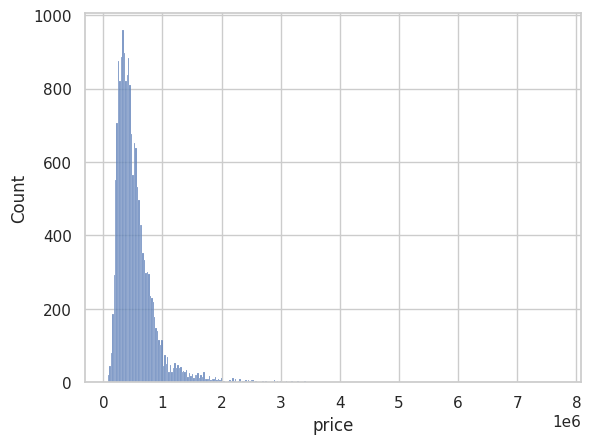

In [1758]:
sns.histplot(df,x=df["price"])


# Campo calculado

<Axes: xlabel='yr_renovated', ylabel='Count'>

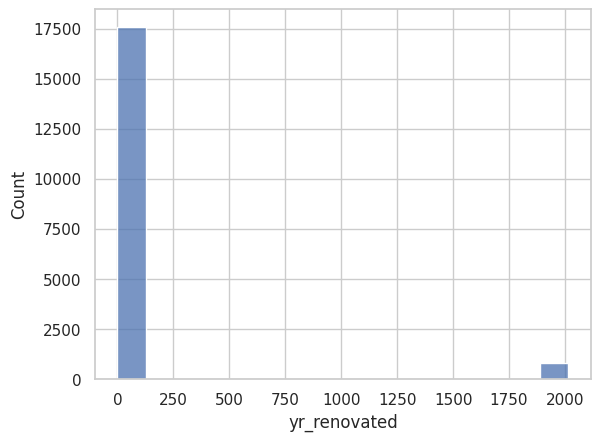

In [1759]:
sns.histplot(df,x=df["yr_renovated"])

In [1760]:
df["yr_renovated"].unique()

array([   0, 2003, 1989, 1994, 1992, 1978, 2013, 2007, 1982, 1986, 2009,
       2015, 2004, 1981, 2005, 2000, 1964, 2011, 2014, 1955, 1958, 1960,
       1987, 1998, 2010, 1979, 1956, 1999, 2001, 1990, 1980, 1995, 1975,
       2002, 1983, 1988, 1996, 1977, 1970, 1991, 2008, 1974, 1997, 2006,
       1965, 1993, 2012, 1984, 1985, 1972, 1969, 1968, 1967, 1950, 1934,
       1971, 1945, 1963, 1957, 1976, 1953, 1962, 1973, 1944, 1940, 1959,
       1948, 1951, 1954, 1946])

In [1761]:
dfe["yr_renovated"].unique()

array([   0, 2003, 1998, 2000, 1977, 2014, 2006, 2009, 1965, 1962, 2002,
       1993, 2013, 1997, 1989, 1985, 1990, 1940, 1982, 1958, 1994, 2004,
       1987, 1992, 1972, 2005, 2007, 1968, 1983, 1988, 2001, 1974, 1945,
       2010, 1979, 1995, 1955, 1969, 1991, 1986, 1980, 2008, 2015, 1960,
       2012, 1978, 1984, 1981])

In [1762]:
currente_year=datetime.now().year
currente_year

2024

In [1763]:
df["c_yr_built"]=currente_year-df["yr_built"]
df["c_yr_built"]

0        21
1        24
2        84
3        46
4        47
         ..
18366    77
18367    36
18368    84
18369    48
18370    72
Name: c_yr_built, Length: 18371, dtype: int64

In [1764]:
dfe["c_yr_built"]=currente_year-dfe["yr_built"]

In [1765]:
df["c_yr_renovated"] = np.where(df["yr_renovated"] > 0, currente_year - df["yr_renovated"], 0)

In [1766]:
dfe["c_yr_renovated"] = np.where(dfe["yr_renovated"] > 0, currente_year - dfe["yr_renovated"], 0)

In [1767]:
df=df.drop("yr_built",axis=1)
dfe=dfe.drop("yr_built",axis=1)
df=df.drop("yr_renovated",axis=1)
dfe=dfe.drop("yr_renovated",axis=1)

In [1768]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,c_yr_built,c_yr_renovated
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.399958e+05,3.368243,2.113385,2079.628055,1.510525e+04,1.494666,0.007294,7.659844,1786.855207,292.772849,98078.080344,47.560525,-122.214107,1985.357629,12712.953024,53.028414,1.192260
std,6237.186244,3.646536e+05,0.934019,0.769465,917.994443,4.215087e+04,0.540669,0.085096,1.177113,828.180612,442.699016,53.407807,0.138310,0.140878,685.955695,27257.274694,29.383190,6.474332
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000,9.000000,0.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,5.037500e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,98033.000000,47.472400,-122.329000,1480.000000,5100.000000,27.000000,0.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,98065.000000,47.572000,-122.231000,1830.000000,7620.000000,49.000000,0.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.065350e+04,2.000000,0.000000,8.000000,2210.000000,570.000000,98118.000000,47.678300,-122.124000,2360.000000,10076.000000,73.000000,0.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,124.000000,90.000000


In [1769]:
dfe.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,c_yr_built,c_yr_renovated
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,10642.964837,3.385564,2.122532,2081.439235,15116.697717,1.492289,0.008945,7.640037,1797.091610,284.347625,98077.143430,47.557378,-122.212702,1993.323257,13082.964837,52.804750,1.186613
std,6249.592818,0.907313,0.774181,921.107089,37016.630589,0.536196,0.094169,1.166080,827.656744,441.871798,54.054027,0.139985,0.140560,682.250199,27570.589561,29.321734,6.679282
min,2.000000,0.000000,0.500000,390.000000,609.000000,1.000000,0.000000,4.000000,390.000000,0.000000,98001.000000,47.176400,-122.504000,399.000000,809.000000,9.000000,0.000000
25%,5298.250000,3.000000,1.750000,1430.000000,5100.000000,1.000000,0.000000,7.000000,1200.000000,0.000000,98031.000000,47.461900,-122.324000,1494.000000,5120.000000,27.000000,0.000000
50%,10543.000000,3.000000,2.250000,1920.000000,7645.500000,1.500000,0.000000,7.000000,1580.000000,0.000000,98065.000000,47.570200,-122.228000,1860.000000,7635.000000,48.000000,0.000000
75%,16098.250000,4.000000,2.500000,2520.000000,10800.000000,2.000000,0.000000,8.000000,2230.000000,540.000000,98117.000000,47.676700,-122.127250,2370.000000,10125.000000,72.000000,0.000000
max,21605.000000,10.000000,6.500000,10040.000000,623779.000000,3.500000,1.000000,13.000000,7680.000000,2600.000000,98199.000000,47.777100,-121.316000,5790.000000,422967.000000,124.000000,84.000000


<Axes: xlabel='c_yr_built', ylabel='Count'>

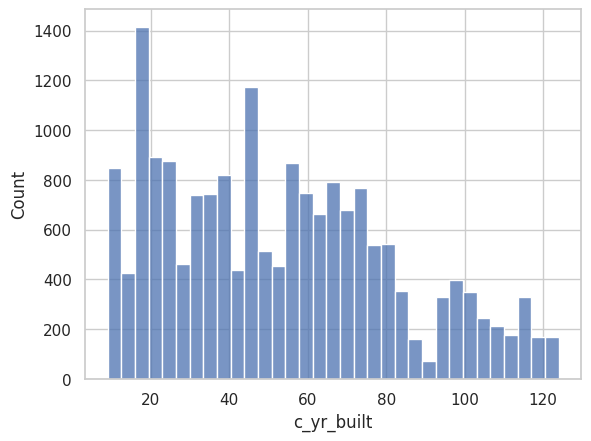

In [1770]:
sns.histplot(df,x=df["c_yr_built"])

<Axes: xlabel='c_yr_renovated', ylabel='Count'>

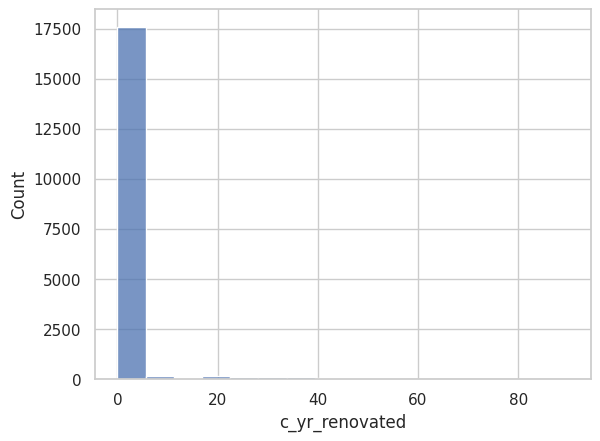

In [1771]:
sns.histplot(df,x=df["c_yr_renovated"])

In [1772]:
print(df["c_yr_built"].unique())
print("\n")
print(df["c_yr_built"].describe())

[ 21  24  84  46  47 123  80  13 118  49 100 122  19 119  94  57  28  70
  82  87  85  53  77  58  20  17 107  18  37  51  55  39  38  30  67  40
 112  66  54  75  15  63  74  73  25  83  56  52 103 104  62 101  10  32
  43  71  76  59  34  16 114  93  23  36  97 108  64  44  61  81  60  95
 102  35  42  12  22  26  45  11 105  79  48  99 115  41  72  98 116  88
 106 121  31  50  89  69  33  92  96  68 124  65 109  14 113  78  86 111
   9  90  27  29 110 117  91 120]


count    18371.000000
mean        53.028414
std         29.383190
min          9.000000
25%         27.000000
50%         49.000000
75%         73.000000
max        124.000000
Name: c_yr_built, dtype: float64


In [1773]:
print(df["c_yr_renovated"].unique())
print("\n")
print(df["c_yr_renovated"].describe())

[ 0 21 35 30 32 46 11 17 42 38 15  9 20 43 19 24 60 13 10 69 66 64 37 26
 14 45 68 25 23 34 44 29 49 22 41 36 28 47 54 33 16 50 27 18 59 31 12 40
 39 52 55 56 57 74 90 53 79 61 67 48 71 62 51 80 84 65 76 73 70 78]


count    18371.000000
mean         1.192260
std          6.474332
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         90.000000
Name: c_yr_renovated, dtype: float64


# Encoding variables categoricas

In [1774]:
print("-"*40)
print("Train:\n")
print(df["view"].unique())
print("-"*40)
print("Evaluation:\n")
print(dfe["view"].unique())

----------------------------------------
Train:

['bad' 'fantastic' 'good' 'great' 'regular']
----------------------------------------
Evaluation:

['bad' 'great' 'regular' 'good' 'fantastic']


<Axes: xlabel='view', ylabel='Count'>

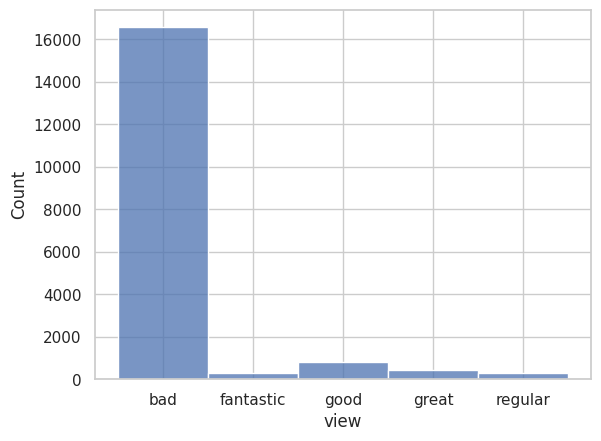

In [1775]:
sns.histplot(df,x=df["view"])

In [1776]:
print("-"*40)
print("Train:\n")
print(df["condition"].unique())
print("-"*40)
print("Evaluation:\n")
print(dfe["condition"].unique())

----------------------------------------
Train:

['acceptable' 'good' 'excellent' 'regular' 'bad']
----------------------------------------
Evaluation:

['acceptable' 'excellent' 'good' 'regular' 'bad']


<Axes: xlabel='condition', ylabel='Count'>

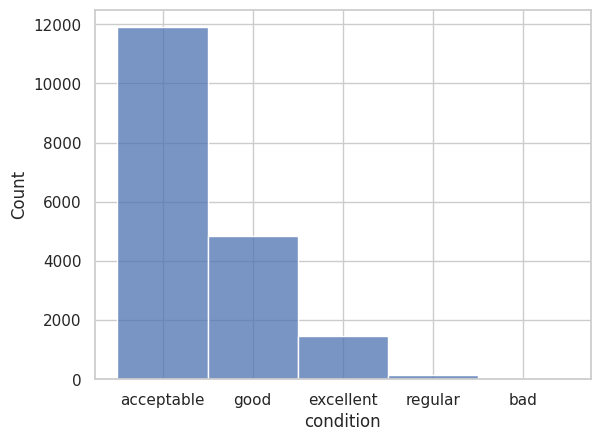

In [1777]:
sns.histplot(df,x=df["condition"])

In [1778]:
def FrequencyEncoding(dataset,columna):
  frequency = dataset[columna].value_counts(normalize =True)
  dataset[columna] = dataset[columna].map(frequency)
  return dataset[columna]

In [1779]:
df["view"] = FrequencyEncoding(df,"view")
df["condition"] = FrequencyEncoding(df,"condition")

In [1780]:
dfe["view"] = FrequencyEncoding(dfe,"view")
dfe["condition"] = FrequencyEncoding(dfe,"condition")

In [1781]:
print("view: ",df["view"].unique())

view:  [0.90196505 0.01480594 0.04425453 0.02340646 0.01556801]


In [1782]:
print("condition: ",df["condition"].unique())

condition:  [0.64759676 0.26291438 0.07985412 0.00805618 0.00157857]


<Axes: xlabel='view', ylabel='Count'>

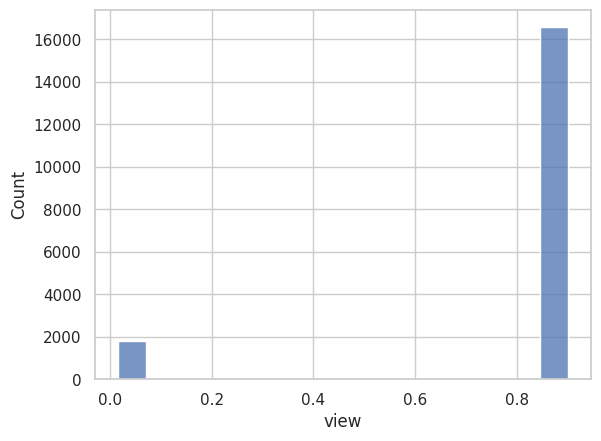

In [1783]:
sns.histplot(df,x=df["view"])

<Axes: xlabel='condition', ylabel='Count'>

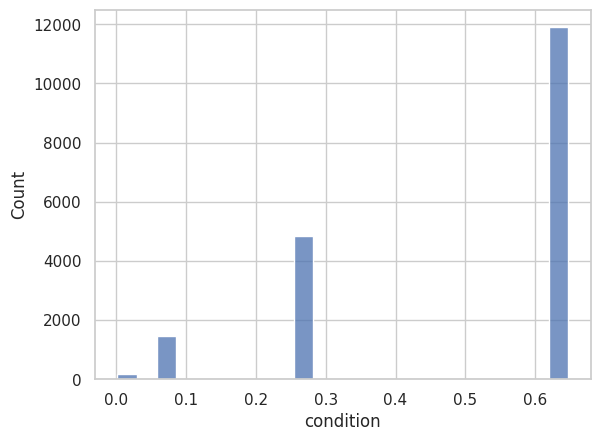

In [1784]:
sns.histplot(df,x=df["condition"])

In [1785]:
print("-"*40)
print("Train:\n")
print(df["condition"].unique())
print("-"*40)
print("Evaluation:\n")
print(dfe["condition"].unique())

----------------------------------------
Train:

[0.64759676 0.26291438 0.07985412 0.00805618 0.00157857]
----------------------------------------
Evaluation:

[6.58235657e-01 7.21776681e-02 2.61875386e-01 7.40283775e-03
 3.08451573e-04]


In [1786]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,c_yr_built,c_yr_renovated
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.399958e+05,3.368243,2.113385,2079.628055,1.510525e+04,1.494666,0.007294,0.816509,0.494950,7.659844,1786.855207,292.772849,98078.080344,47.560525,-122.214107,1985.357629,12712.953024,53.028414,1.192260
std,6237.186244,3.646536e+05,0.934019,0.769465,917.994443,4.215087e+04,0.540669,0.085096,0.259247,0.212840,1.177113,828.180612,442.699016,53.407807,0.138310,0.140878,685.955695,27257.274694,29.383190,6.474332
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.014806,0.001579,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000,9.000000,0.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,5.037500e+03,1.000000,0.000000,0.901965,0.262914,7.000000,1190.000000,0.000000,98033.000000,47.472400,-122.329000,1480.000000,5100.000000,27.000000,0.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,0.901965,0.647597,7.000000,1560.000000,0.000000,98065.000000,47.572000,-122.231000,1830.000000,7620.000000,49.000000,0.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.065350e+04,2.000000,0.000000,0.901965,0.647597,8.000000,2210.000000,570.000000,98118.000000,47.678300,-122.124000,2360.000000,10076.000000,73.000000,0.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,0.901965,0.647597,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,124.000000,90.000000


In [1787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18371 entries, 0 to 18370
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              18371 non-null  int64  
 1   price           18371 non-null  float64
 2   bedrooms        18371 non-null  int64  
 3   bathrooms       18371 non-null  float64
 4   sqft_living     18371 non-null  int64  
 5   sqft_lot        18371 non-null  int64  
 6   floors          18371 non-null  float64
 7   waterfront      18371 non-null  int64  
 8   view            18371 non-null  float64
 9   condition       18371 non-null  float64
 10  grade           18371 non-null  int64  
 11  sqft_above      18371 non-null  int64  
 12  sqft_basement   18371 non-null  int64  
 13  zipcode         18371 non-null  int64  
 14  lat             18371 non-null  float64
 15  long            18371 non-null  float64
 16  sqft_living15   18371 non-null  int64  
 17  sqft_lot15      18371 non-null 

In [1788]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3242 non-null   int64  
 1   bedrooms        3242 non-null   int64  
 2   bathrooms       3242 non-null   float64
 3   sqft_living     3242 non-null   int64  
 4   sqft_lot        3242 non-null   int64  
 5   floors          3242 non-null   float64
 6   waterfront      3242 non-null   int64  
 7   view            3242 non-null   float64
 8   condition       3242 non-null   float64
 9   grade           3242 non-null   int64  
 10  sqft_above      3242 non-null   int64  
 11  sqft_basement   3242 non-null   int64  
 12  zipcode         3242 non-null   int64  
 13  lat             3242 non-null   float64
 14  long            3242 non-null   float64
 15  sqft_living15   3242 non-null   int64  
 16  sqft_lot15      3242 non-null   int64  
 17  c_yr_built      3242 non-null   i

# Mostrar correlación

In [1789]:
def identificarCorrelacion(dataset):
  f = dataset.corr()
  mask=np.triu(np.ones_like(f))
  #Ajustando el tamaño para que se vea mejor
  plt.figure(figsize=[18,11])
  sns.heatmap(f,annot=True,cmap="coolwarm",mask=mask,fmt=".2f",square=True, linewidths=.6)
  plt.title("Matriz de Correlación")
  plt.show()

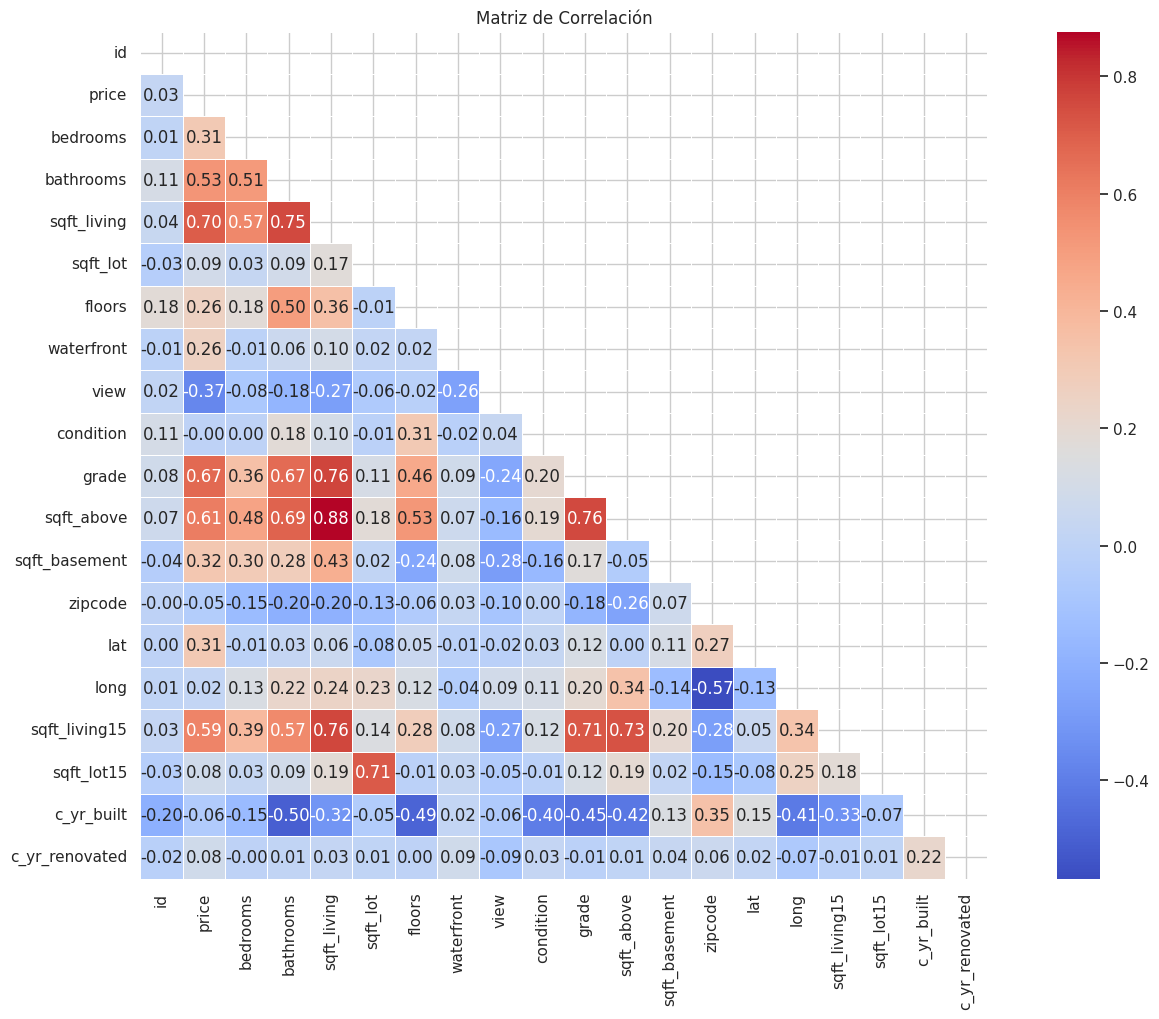

In [1790]:
identificarCorrelacion(df)

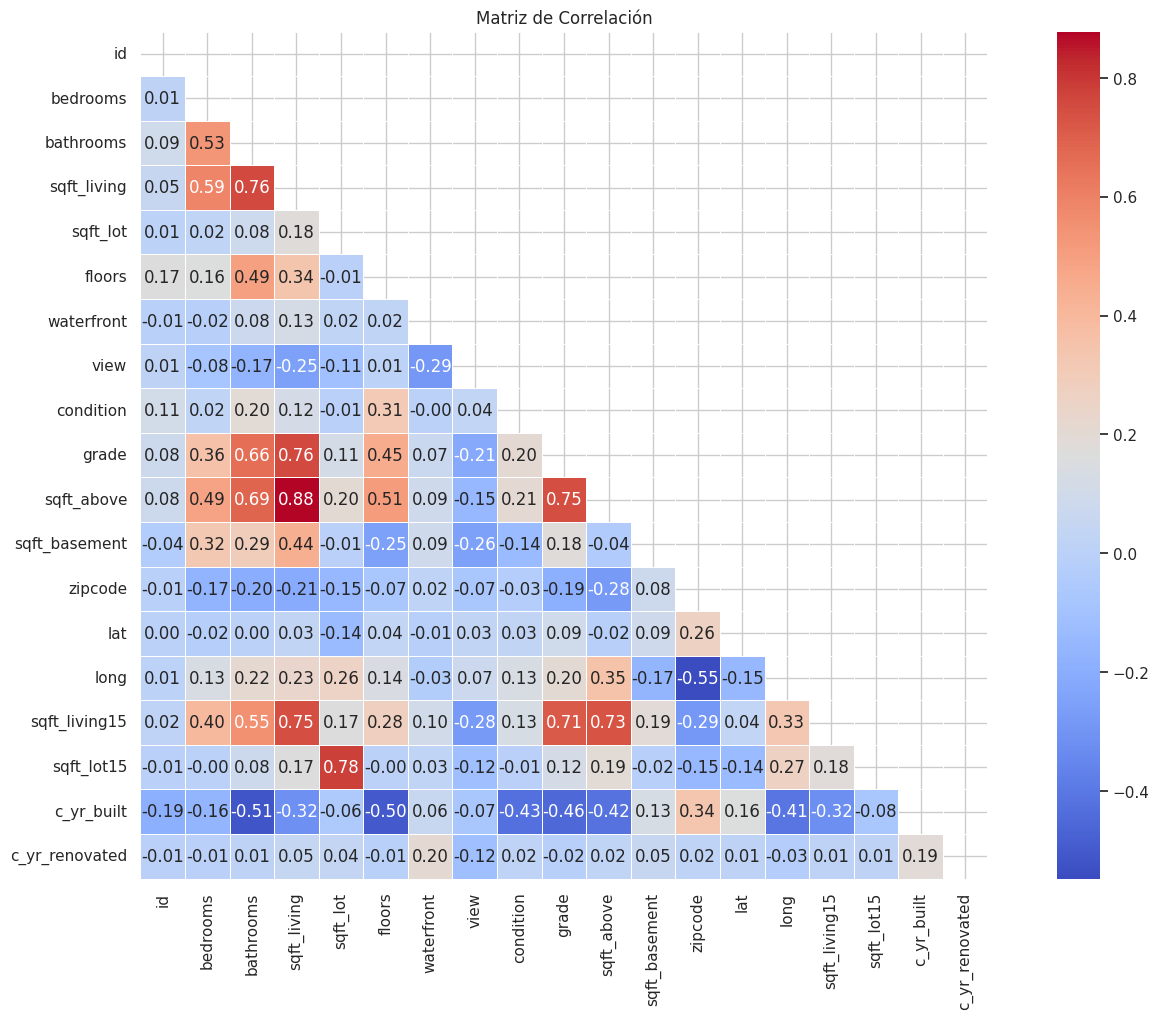

In [1791]:
identificarCorrelacion(dfe)

In [1792]:
corr=df.corr()
print(corr["price"].sort_values(ascending=False))

price             1.000000
sqft_living       0.702274
grade             0.671937
sqft_above        0.606093
sqft_living15     0.588373
bathrooms         0.526817
sqft_basement     0.322408
lat               0.310122
bedrooms          0.308297
floors            0.261259
waterfront        0.259160
sqft_lot          0.089598
sqft_lot15        0.084227
c_yr_renovated    0.083194
id                0.028906
long              0.019400
condition        -0.001709
zipcode          -0.047409
c_yr_built       -0.056949
view             -0.367738
Name: price, dtype: float64


In [1793]:
df=df.drop(columns=["sqft_lot","sqft_lot15","c_yr_renovated","long","condition","zipcode","c_yr_built"],axis=1)

In [1794]:
dfe=dfe.drop(columns=["sqft_lot","sqft_lot15","c_yr_renovated","long","condition","zipcode","c_yr_built"],axis=1)

In [1795]:
corr=df.corr()
print(corr["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702274
grade            0.671937
sqft_above       0.606093
sqft_living15    0.588373
bathrooms        0.526817
sqft_basement    0.322408
lat              0.310122
bedrooms         0.308297
floors           0.261259
waterfront       0.259160
id               0.028906
view            -0.367738
Name: price, dtype: float64


# Retirando outliers


In [1796]:
def CuantificaOutliers (dataset):
  for col in dataset.columns:
    q1, q3 = np.percentile(dataset[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outlier = dataset[(dataset[col] < lower_bound)
                  | (dataset[col] > upper_bound)]
    print(col,":  (",outlier.shape[0]," / ",dataset.shape[0]," )  ",(outlier.shape[0] /  dataset.shape[0])*100,"%")

In [1797]:
CuantificaOutliers(df)

id :  ( 0  /  18371  )   0.0 %
price :  ( 966  /  18371  )   5.258287518371346 %
bedrooms :  ( 466  /  18371  )   2.5366066082412497 %
bathrooms :  ( 222  /  18371  )   1.2084263240977628 %
sqft_living :  ( 482  /  18371  )   2.623700397365413 %
floors :  ( 0  /  18371  )   0.0 %
waterfront :  ( 134  /  18371  )   0.7294104839148658 %
view :  ( 1801  /  18371  )   9.803494638288607 %
grade :  ( 1639  /  18371  )   8.921670023406456 %
sqft_above :  ( 511  /  18371  )   2.7815578901529583 %
sqft_basement :  ( 397  /  18371  )   2.1610146426432966 %
lat :  ( 3  /  18371  )   0.016330085460780578 %
sqft_living15 :  ( 447  /  18371  )   2.4331827336563063 %


In [1798]:
CuantificaOutliers(dfe)

id :  ( 0  /  3242  )   0.0 %
bedrooms :  ( 80  /  3242  )   2.4676125848241828 %
bathrooms :  ( 91  /  3242  )   2.8069093152375078 %
sqft_living :  ( 91  /  3242  )   2.8069093152375078 %
floors :  ( 0  /  3242  )   0.0 %
waterfront :  ( 29  /  3242  )   0.8945095619987662 %
view :  ( 323  /  3242  )   9.962985811227638 %
grade :  ( 272  /  3242  )   8.389882788402222 %
sqft_above :  ( 99  /  3242  )   3.053670573719926 %
sqft_basement :  ( 91  /  3242  )   2.8069093152375078 %
lat :  ( 0  /  3242  )   0.0 %
sqft_living15 :  ( 74  /  3242  )   2.282541640962369 %


In [1799]:
def ModificaOutliers (dataset,cols):
  for col in cols:
    q1, q3 = np.percentile(dataset[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    dataset[col]=np.where(dataset[col]>upper_bound,upper_bound,np.where(dataset[col]<lower_bound,lower_bound,dataset[col]))
  return dataset

In [1800]:
columnas=["price","bedrooms","bathrooms","sqft_living","waterfront","view","grade","sqft_above","sqft_basement","lat","sqft_living15"]

In [1801]:
df=ModificaOutliers(df,columnas)

In [1802]:
columnas=["bedrooms","bathrooms","sqft_living","waterfront","view","grade","sqft_above","sqft_basement","sqft_living15"]

In [1803]:
dfe=ModificaOutliers(dfe,columnas)

In [1804]:
CuantificaOutliers(df)

id :  ( 0  /  18371  )   0.0 %
price :  ( 0  /  18371  )   0.0 %
bedrooms :  ( 0  /  18371  )   0.0 %
bathrooms :  ( 0  /  18371  )   0.0 %
sqft_living :  ( 0  /  18371  )   0.0 %
floors :  ( 0  /  18371  )   0.0 %
waterfront :  ( 0  /  18371  )   0.0 %
view :  ( 0  /  18371  )   0.0 %
grade :  ( 0  /  18371  )   0.0 %
sqft_above :  ( 0  /  18371  )   0.0 %
sqft_basement :  ( 0  /  18371  )   0.0 %
lat :  ( 0  /  18371  )   0.0 %
sqft_living15 :  ( 0  /  18371  )   0.0 %


In [1805]:
CuantificaOutliers(dfe)

id :  ( 0  /  3242  )   0.0 %
bedrooms :  ( 0  /  3242  )   0.0 %
bathrooms :  ( 0  /  3242  )   0.0 %
sqft_living :  ( 0  /  3242  )   0.0 %
floors :  ( 0  /  3242  )   0.0 %
waterfront :  ( 0  /  3242  )   0.0 %
view :  ( 0  /  3242  )   0.0 %
grade :  ( 0  /  3242  )   0.0 %
sqft_above :  ( 0  /  3242  )   0.0 %
sqft_basement :  ( 0  /  3242  )   0.0 %
lat :  ( 0  /  3242  )   0.0 %
sqft_living15 :  ( 0  /  3242  )   0.0 %


# Verificando la correlación
df1 y dfe1 se trataron los outliers para luego eliminar los que tienen menor correlación con la variable objetivo

In [1806]:
corr=df.corr()
print(corr["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702783
grade            0.688412
sqft_living15    0.627821
sqft_above       0.603317
bathrooms        0.535655
lat              0.404529
bedrooms         0.352236
floors           0.302257
sqft_basement    0.295774
id               0.037640
waterfront            NaN
view                  NaN
Name: price, dtype: float64


In [1807]:
df=df.drop(columns=["waterfront","view"],axis=1)

In [1808]:
dfe=dfe.drop(columns=["waterfront","view"],axis=1)

In [1809]:
corr=df.corr()
print(corr["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702783
grade            0.688412
sqft_living15    0.627821
sqft_above       0.603317
bathrooms        0.535655
lat              0.404529
bedrooms         0.352236
floors           0.302257
sqft_basement    0.295774
id               0.037640
Name: price, dtype: float64


In [1810]:
colEl=["sqft_lot","sqft_lot15","long","condition","zipcode","c_yr_built","waterfront","view","c_yr_renovated"]

In [1811]:
#df1=df1.drop(columns=colEl,axis=1)

In [1812]:
#dfe1=dfe1.drop(columns=colEl,axis=1)

# Prueba de Distribución normal
Identificar si nuestros datos provienen de una distribución normal

In [1813]:
def interpretar_p_valor(p_valor):
    if p_valor > 0.05:
        return "El conjunto de datos se ajusta a una distribución normal (p-valor > 0.05)"
    elif p_valor > 0.01:
        return "El conjunto de datos puede no seguir exactamente una distribución normal (0.01 < p-valor ≤ 0.05)"
    elif p_valor > 0.001:
        return "El conjunto de datos probablemente no sigue una distribución normal (0.001 < p-valor ≤ 0.01)"
    else:
        return "El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)"

In [1814]:
def pruebaKstest(dataset,tipo):
  for col in dataset.columns:
    e,p=kstest(dataset[col],'norm',args=(dataset[col].mean(),dataset[col].std()))
    print("-"*80)
    print(f"K-S | {tipo} | Estadistico para {col} = {e:.3f} p_value= {p:.6f} \n")
    print(interpretar_p_valor(p))

In [1815]:
def pruebaShapiro(dataset,tipo):
  for col in dataset.columns:
    e,p=shapiro(dataset[col])
    print("-"*80)
    print(f"K-S | {tipo} | Estadistico para {col} = {e:.3f} p_value= {p:.6f} \n")
    print(interpretar_p_valor(p))

In [1816]:
pruebaKstest(df,"Train CO")

--------------------------------------------------------------------------------
K-S | Train CO | Estadistico para id = 0.057 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train CO | Estadistico para price = 0.100 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train CO | Estadistico para bedrooms = 0.256 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train CO | Estadistico para bathrooms = 0.127 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train CO | Estadistico pa

In [1817]:
pruebaShapiro(dfe,"Evaluation CO")

--------------------------------------------------------------------------------
K-S | Evaluation CO | Estadistico para id = 0.954 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Evaluation CO | Estadistico para bedrooms = 0.880 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Evaluation CO | Estadistico para bathrooms = 0.940 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Evaluation CO | Estadistico para sqft_living = 0.952 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S |

# Estandarizando data

In [1818]:
def mostrarHistograma (dataset, col):
  plt.figure(figsize=(10,6))
  sns.histplot(dataset[col],kde=True)
  plt.title(f"Distibución de {col}")
  plt.xlabel(col)
  plt.ylabel("Frecuencia")
  plt.show()

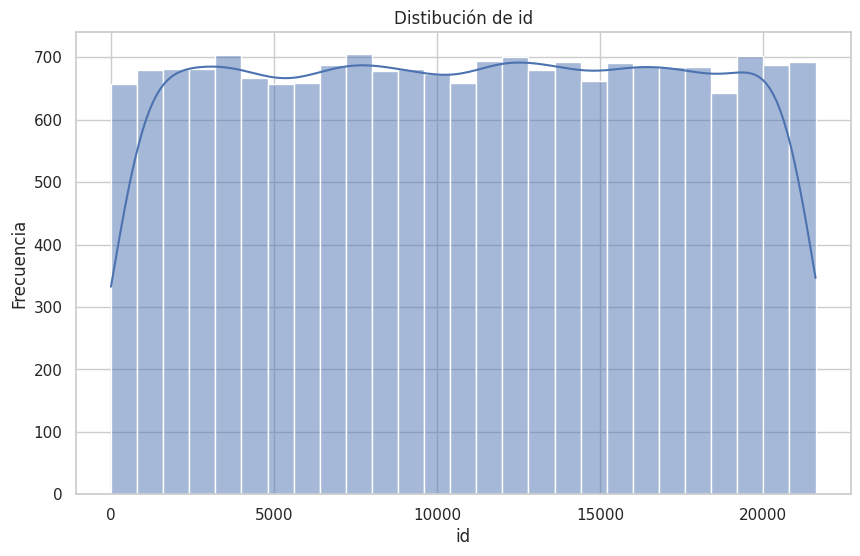

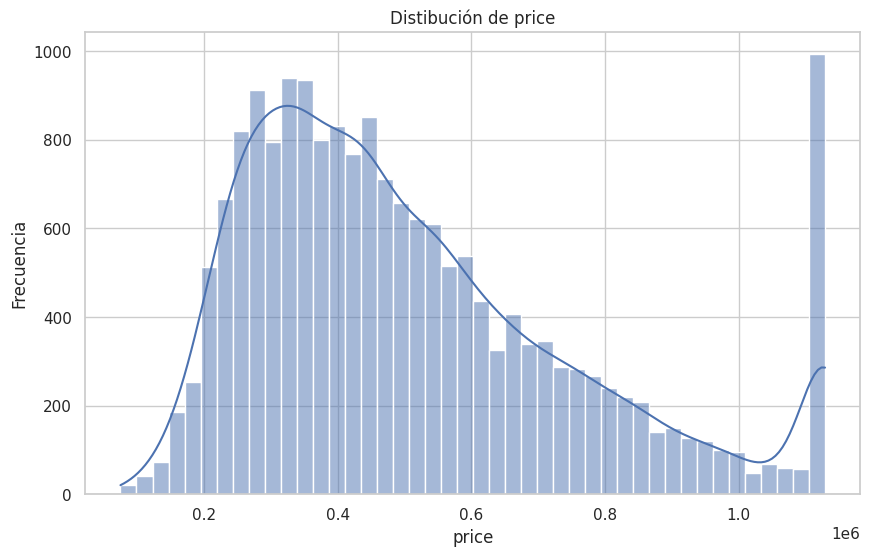

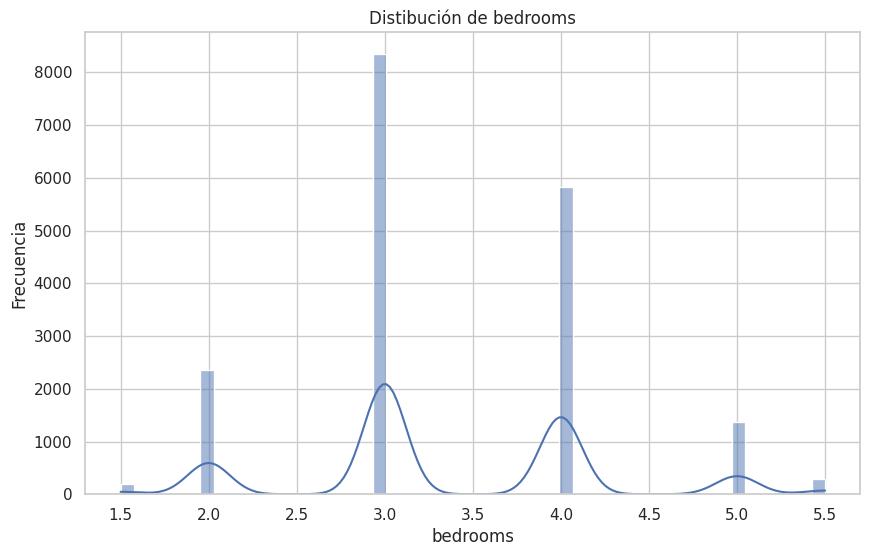

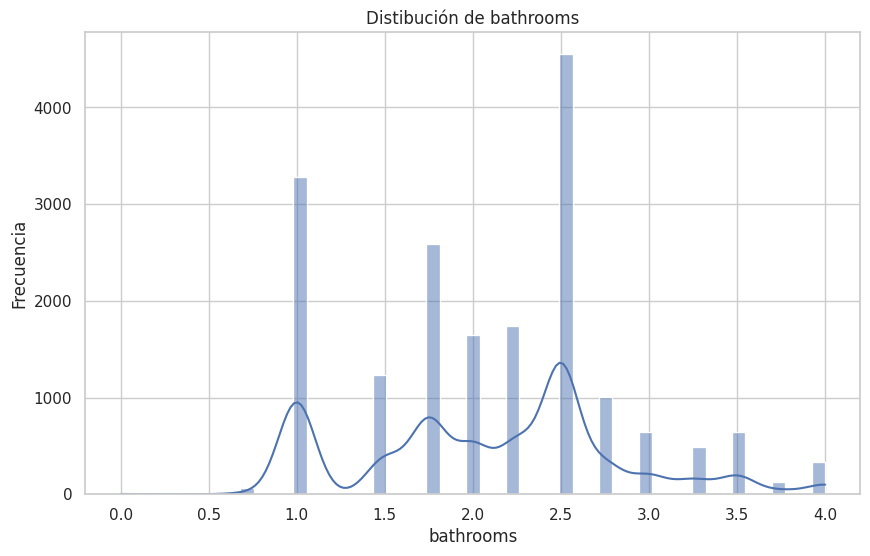

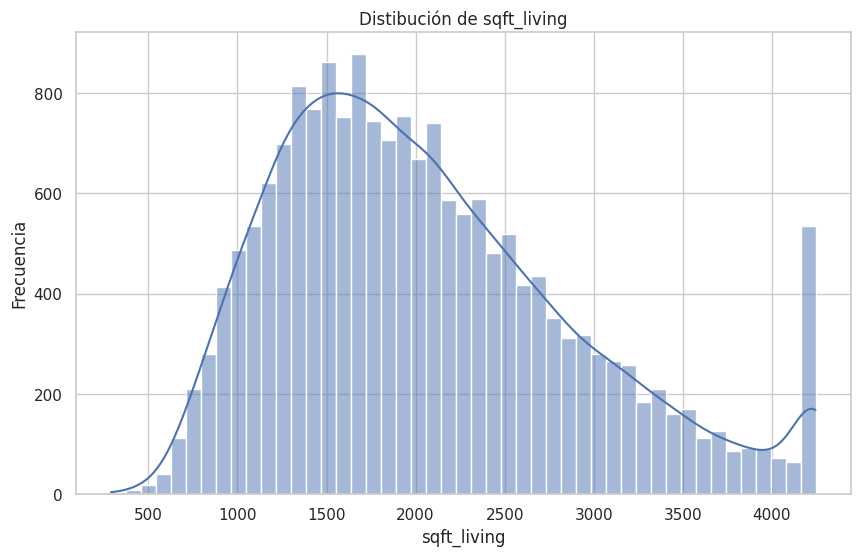

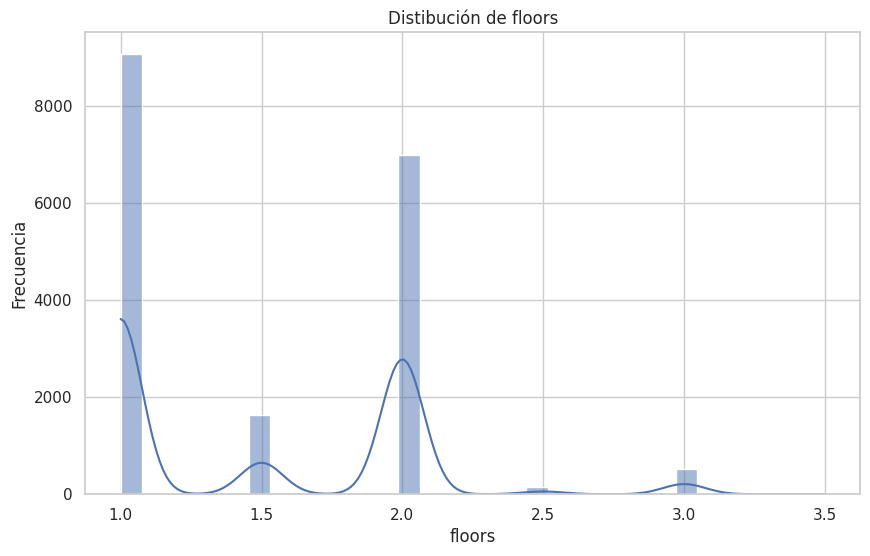

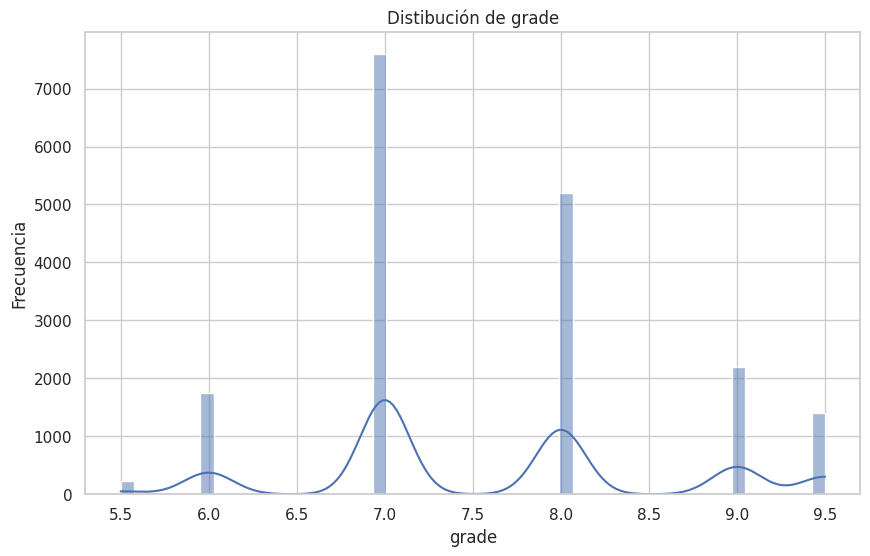

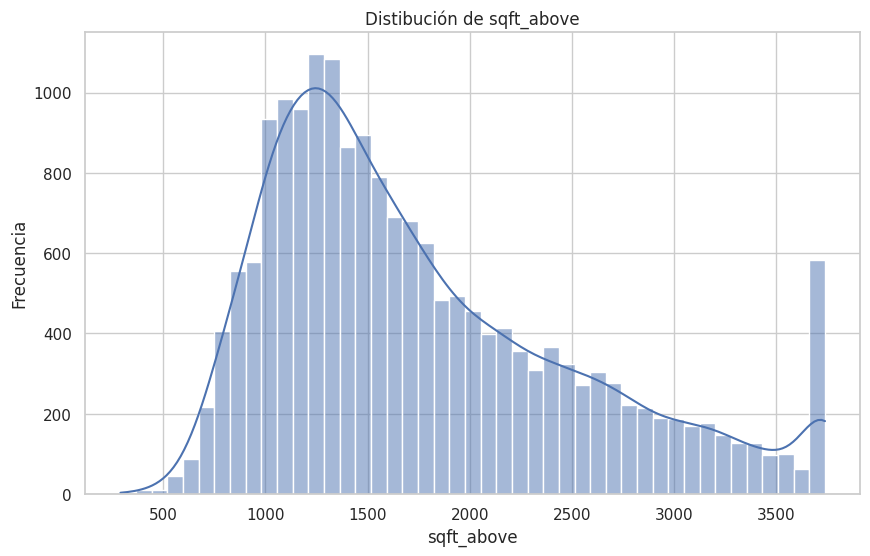

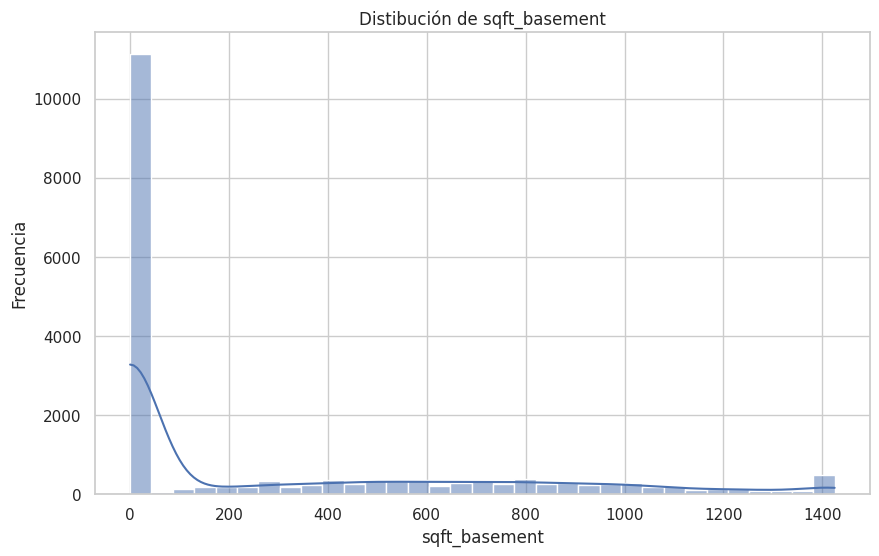

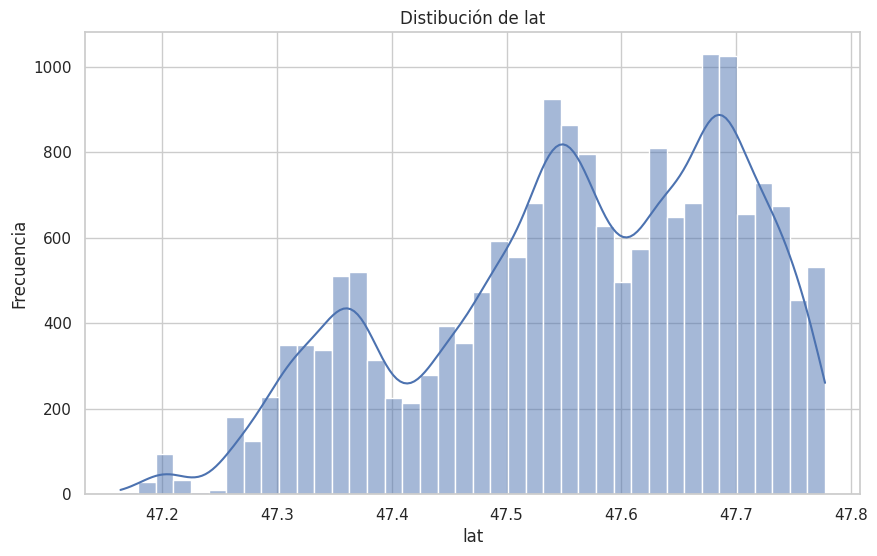

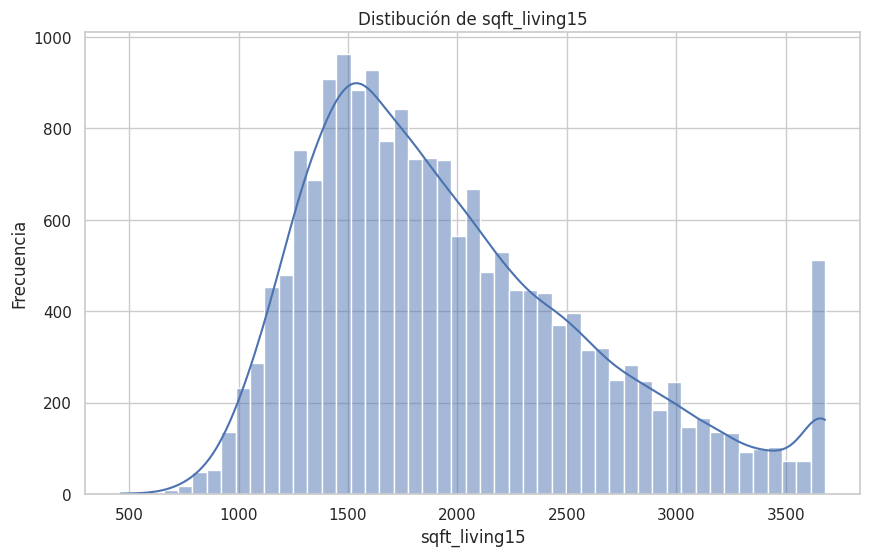

In [1819]:
sns.set(style="whitegrid")
for column in df.columns:
  mostrarHistograma(df,column)

In [1820]:
#estandarizado=(X-media)/std
def estandarizacion1(dataset):
  estValor=StandardScaler().fit_transform(dataset.values.reshape(-1,1))
  return estValor

In [1821]:
#estandarizado=(x-rango_intercuartilico)/std
def estandarizacion2(series):
  scaler = RobustScaler()
  series_reshaped = series.values.reshape(-1, 1)  # Convertir a 2D
  series_scaled = scaler.fit_transform(series_reshaped)
  return pd.Series(series_scaled.flatten(), index=series.index)

In [1822]:
#Garantiza que tenga valores positivos
def normalizacion2(dataset):
  estNor=Normalizer().fit_transform(dataset)
  return estNor

In [1823]:
#Debe considerar que los outliers afectan demasiado
def normalizacion1(dataset):
  scaler = MinMaxScaler()
  series_reshaped = dataset.values.reshape(-1, 1)  # Convertir a 2D
  series_scaled = scaler.fit_transform(series_reshaped)
  return pd.Series(series_scaled.flatten(), index=dataset.index)

In [1824]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,lat,sqft_living15
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.00000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.118084e+05,3.360623,2.105084,2058.514234,1.494666,7.600920,1768.14844,286.080725,47.560525,1974.392630
std,6237.186244,2.498699e+05,0.855396,0.741712,841.068560,0.540669,1.001846,764.51211,419.279394,0.138308,650.976863
min,0.000000,7.500000e+04,1.500000,0.000000,290.000000,1.000000,5.500000,290.00000,0.000000,47.163550,460.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,1.000000,7.000000,1190.00000,0.000000,47.472400,1480.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,7.000000,1560.00000,0.000000,47.572000,1830.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,8.000000,2210.00000,570.000000,47.678300,2360.000000
max,21612.000000,1.129050e+06,5.500000,4.000000,4245.000000,3.500000,9.500000,3740.00000,1425.000000,47.777600,3680.000000


In [1825]:
pruebaKstest(df,"Train")

--------------------------------------------------------------------------------
K-S | Train | Estadistico para id = 0.057 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train | Estadistico para price = 0.100 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train | Estadistico para bedrooms = 0.256 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train | Estadistico para bathrooms = 0.127 p_value= 0.000000 

El conjunto de datos no sigue una distribución normal (p-valor ≤ 0.001)
--------------------------------------------------------------------------------
K-S | Train | Estadistico para sqft_living 

In [1826]:
df["price"]=np.log(df["price"])
df["price"]=normalizacion1(df["price"])
df["bedrooms"]=estandarizacion1(df["bedrooms"])
df["bathrooms"]=estandarizacion1(df["bathrooms"])
df["sqft_living"]=estandarizacion1(df["sqft_living"])
df["floors"]=estandarizacion1(df["floors"])
df["grade"]=estandarizacion1(df["grade"])
df["sqft_above"]=estandarizacion1(df["sqft_above"])
df["sqft_basement"]=estandarizacion1(df["sqft_basement"])
df["lat"]=np.log(df["lat"])
df["lat"]=estandarizacion1(df["lat"])
df["sqft_living15"]=estandarizacion1(df["sqft_living15"])

In [1827]:
dfe["bedrooms"]=estandarizacion1(dfe["bedrooms"])
dfe["bathrooms"]=estandarizacion1(dfe["bathrooms"])
dfe["sqft_living"]=estandarizacion1(dfe["sqft_living"])
dfe["floors"]=estandarizacion1(dfe["floors"])
dfe["grade"]=estandarizacion1(dfe["grade"])
dfe["sqft_above"]=estandarizacion1(dfe["sqft_above"])
dfe["sqft_basement"]=estandarizacion1(dfe["sqft_basement"])
dfe["lat"]=np.log(dfe["lat"])
dfe["lat"]=estandarizacion1(dfe["lat"])
dfe["sqft_living15"]=estandarizacion1(dfe["sqft_living15"])

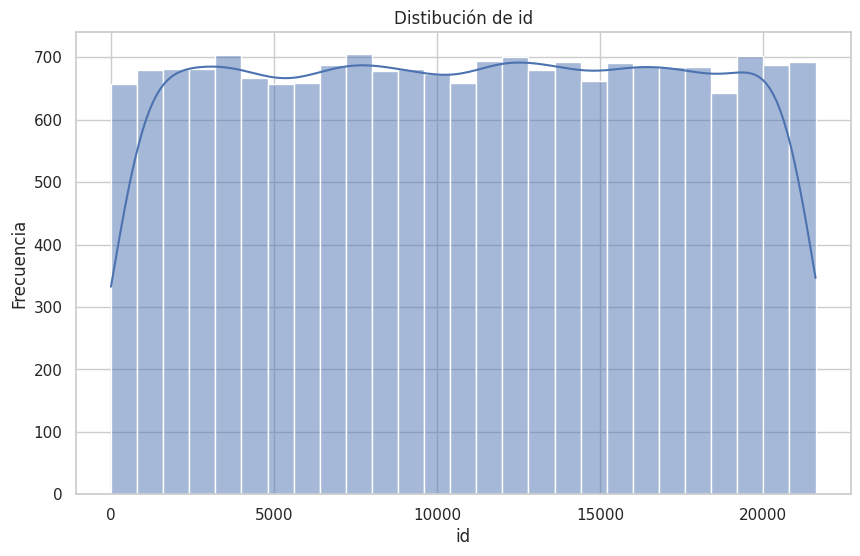

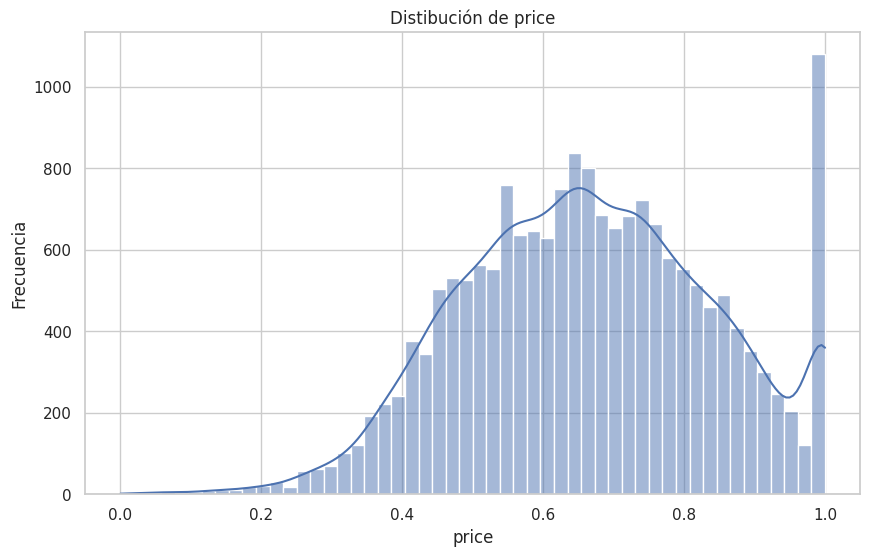

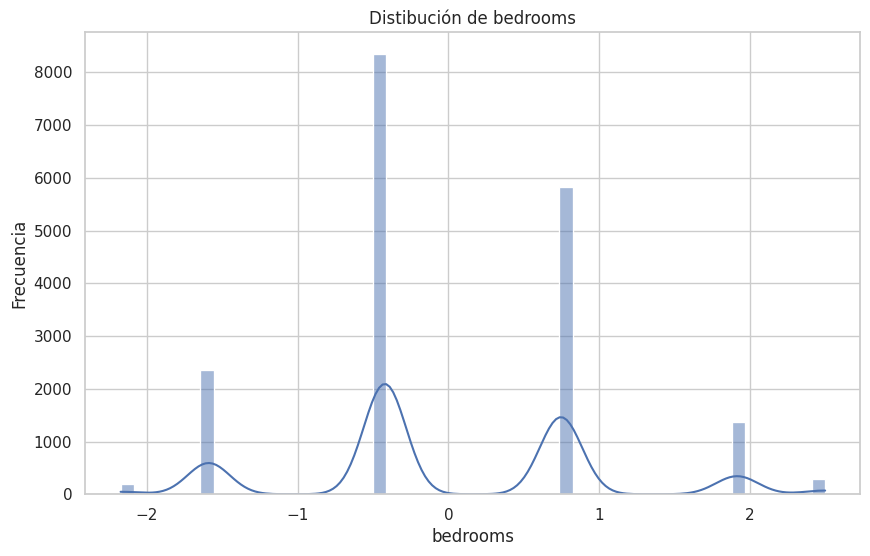

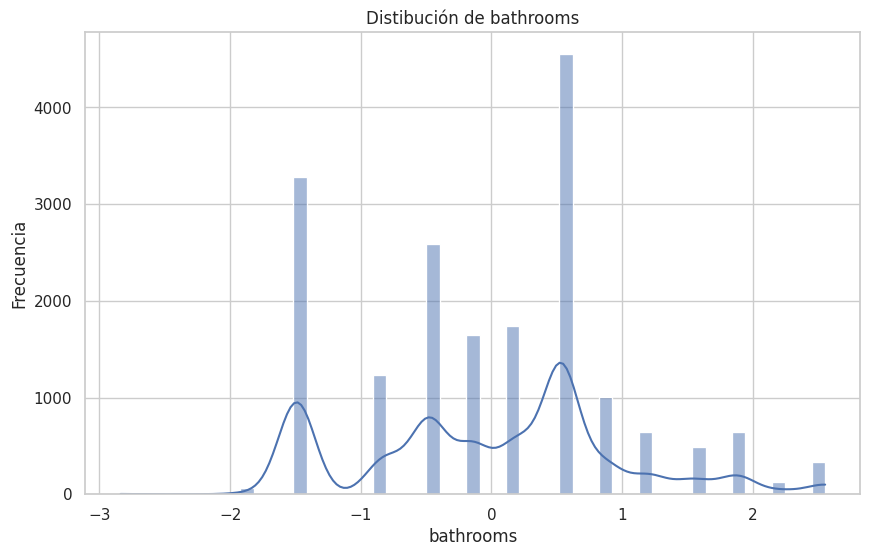

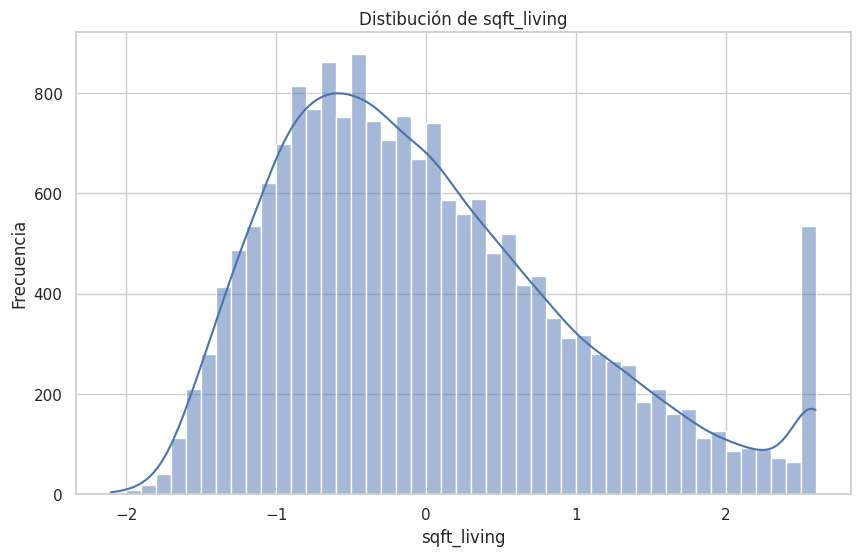

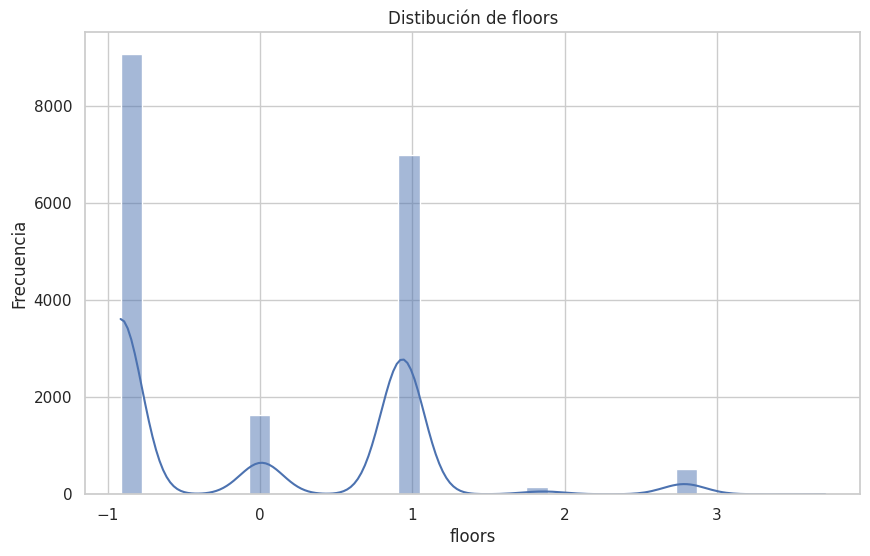

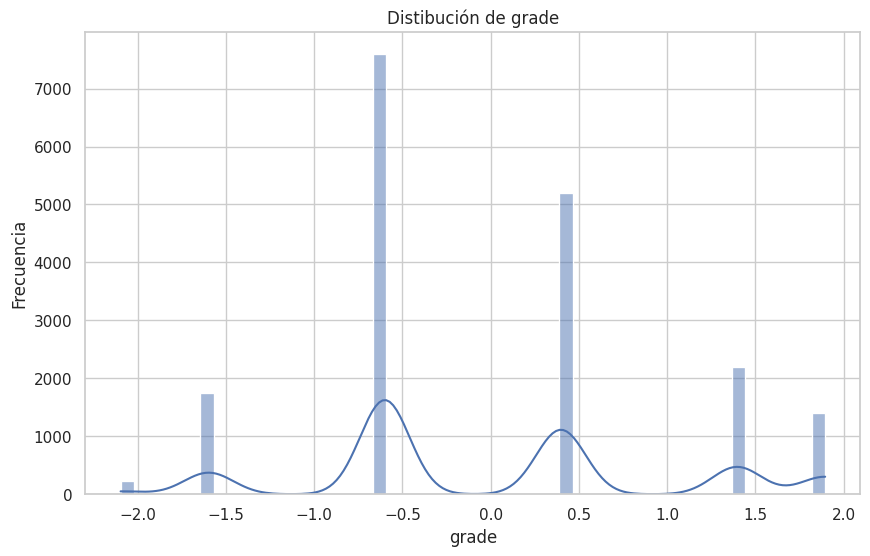

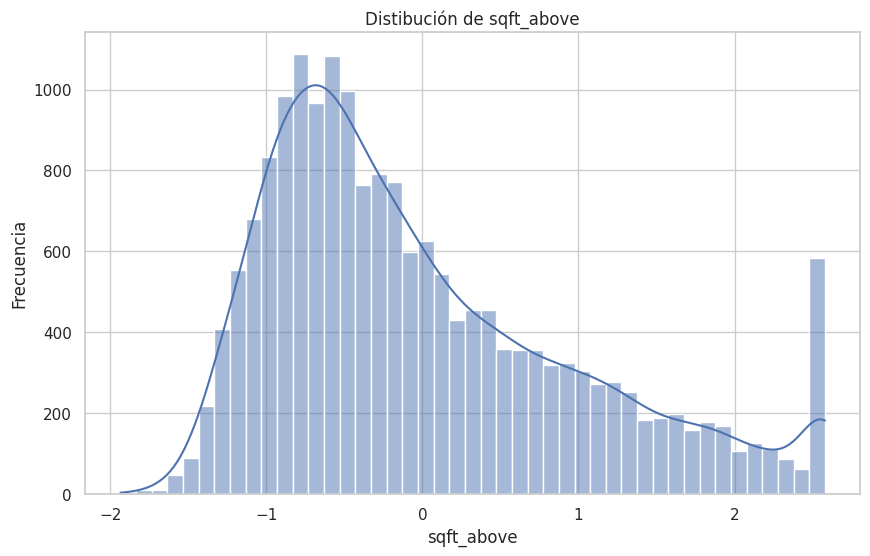

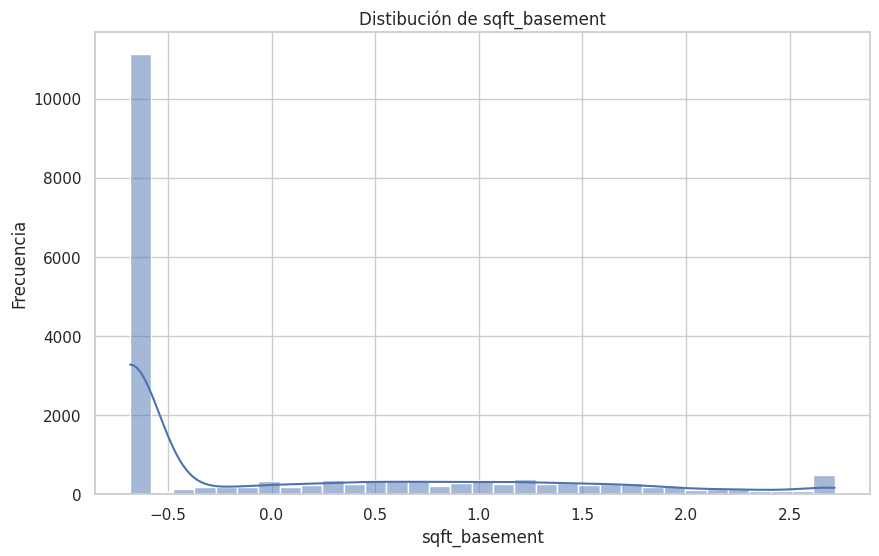

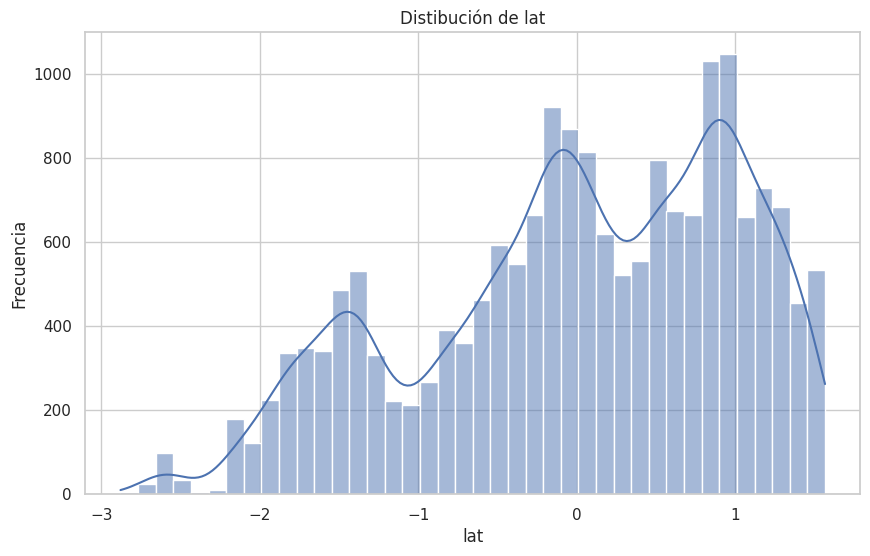

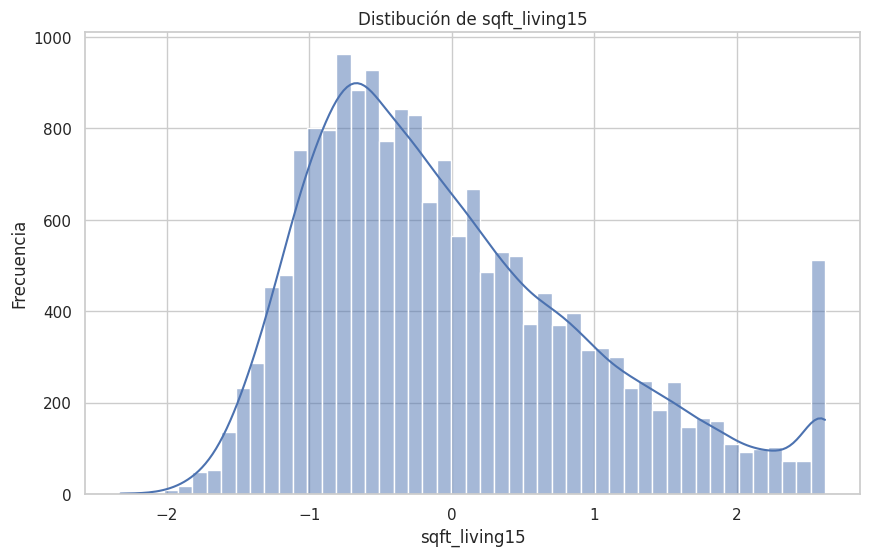

In [1828]:
sns.set(style="whitegrid")
for column in df.columns:
  mostrarHistograma(df,column)

# Analizando varianza


In [1829]:
varianza=df.var()
varianza


id               3.890249e+07
price            3.190960e-02
bedrooms         1.000054e+00
bathrooms        1.000054e+00
sqft_living      1.000054e+00
floors           1.000054e+00
grade            1.000054e+00
sqft_above       1.000054e+00
sqft_basement    1.000054e+00
lat              1.000054e+00
sqft_living15    1.000054e+00
dtype: float64

In [1830]:
varianza2=dfe.var()
varianza2

id               3.905741e+07
bedrooms         1.000309e+00
bathrooms        1.000309e+00
sqft_living      1.000309e+00
floors           1.000309e+00
grade            1.000309e+00
sqft_above       1.000309e+00
sqft_basement    1.000309e+00
lat              1.000309e+00
sqft_living15    1.000309e+00
dtype: float64

Debe eliminar caracteristicas con varianza igual a cero por qué al aplicar un modelo logaritmico y regresión lineal, mejor será eliminar estos valores del modelo

# Correlación entre datos

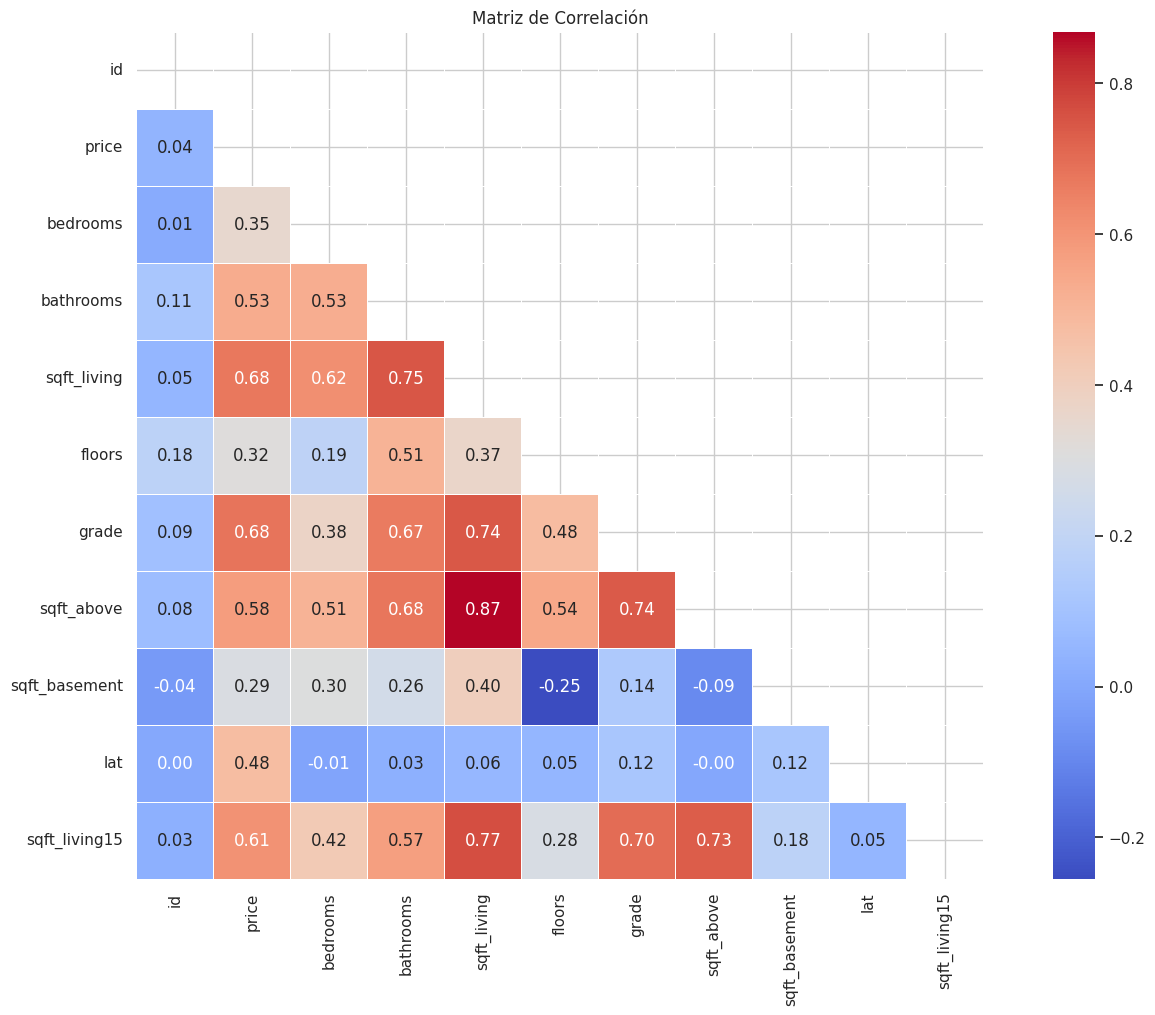

In [1831]:
identificarCorrelacion(df)

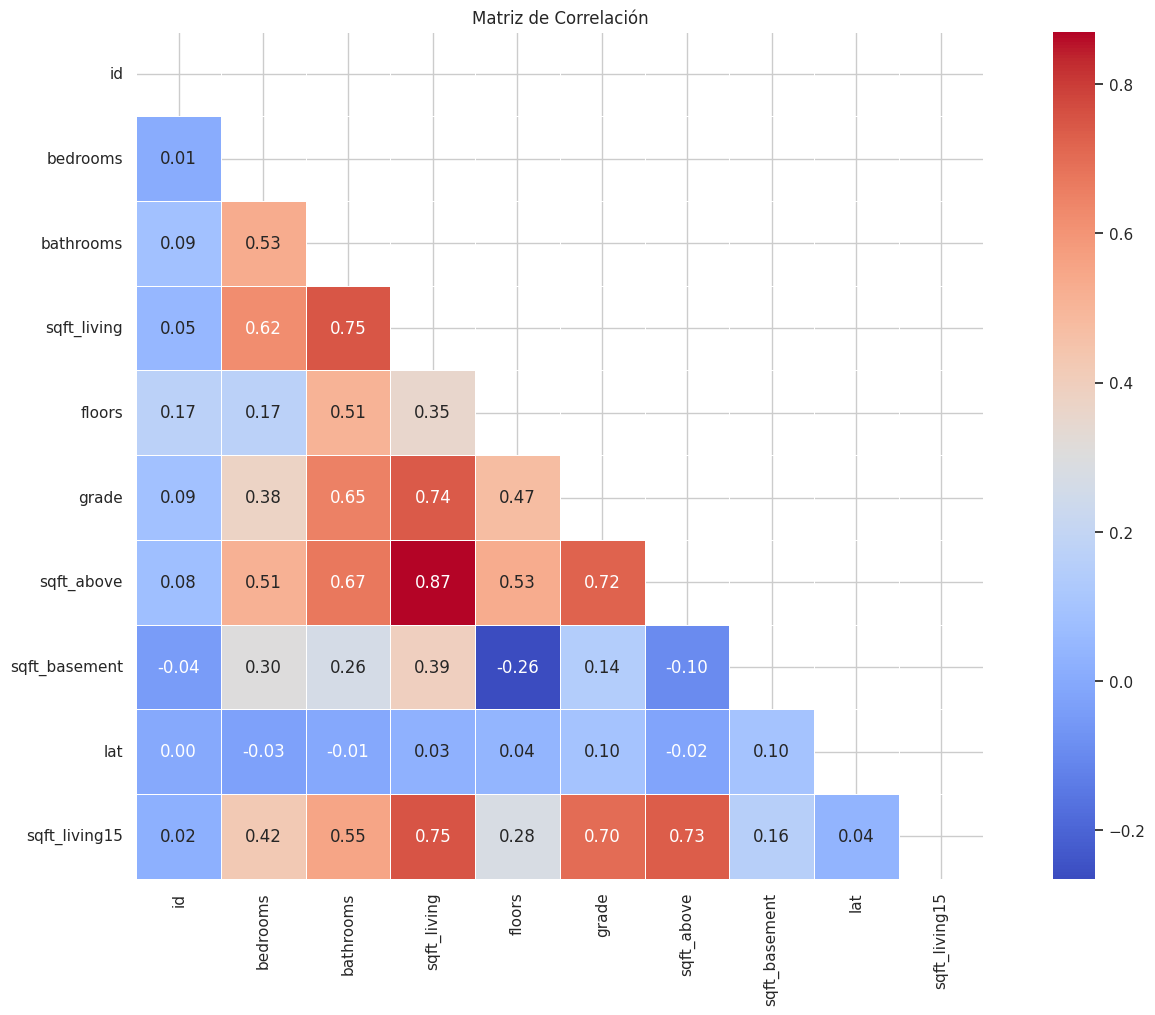

In [1832]:
identificarCorrelacion(dfe)

In [1833]:
corr=df.corr()
print(corr["price"].sort_values(ascending=False))

price            1.000000
grade            0.681207
sqft_living      0.675044
sqft_living15    0.606268
sqft_above       0.576631
bathrooms        0.534574
lat              0.475204
bedrooms         0.351905
floors           0.315672
sqft_basement    0.290428
id               0.042775
Name: price, dtype: float64


Un nivel de significancia manor de 0.05, no hay evidencia de que los datos siguen una distribución normal; los datos no se distribuyen normalmente.

# Almacenando la data limpia

In [1834]:
clean_data_train=df.copy()
clean_data_test=dfe.copy()
#Guardando la data limpia en csv
df.to_csv("clean_data_train.csv",index=False)
dfe.to_csv("clean_data_test.csv",index=False)

# Variables de análisis

In [1835]:
x_train=clean_data_train.drop(["price"],axis=1)
y_train=clean_data_train["price"]

#x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=25,test_size=0.2)
x_evaluation=clean_data_test

# Regresión lineal

In [1836]:
#Entrenar el modelo
modelLR = LinearRegression().fit(x_train,y_train)
# Efectuar Prediccion
y_hat = modelLR.predict(x_evaluation)

#Evaluar el modelo
#print("Mean square error: ", mean_squared_error(y_test,y_hat))
#print("Mean absolute error: ", mean_absolute_error(y_test,y_hat))
#print("Mean square error: ", r2_score(y_test,y_hat))

# Regresión polinomica

In [1837]:
polyfit = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = polyfit.fit_transform(x_train)
x_test_poly = polyfit.fit_transform(x_evaluation)

In [1838]:
lrpoly=LinearRegression()
lrpoly.fit(x_train_poly,y_train)
#Evaluamos el modelo
y_hat=lrpoly.predict(x_test_poly)
#print("Mean square error: ", mean_squared_error(y_test,y_hat))
#print("Mean absolute error: ", mean_absolute_error(y_test,y_hat))
#print("Mean square error: ", r2_score(y_test,y_hat))
#Mean square error es la medida que usara la pagina para evaluar

# XGBA

In [1839]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)
y_hat=classifier.predict(x_evaluation)

# Subir al portal

In [1840]:
dfresult=pd.DataFrame({"id":x_evaluation["id"],"VALUE":y_hat})
dfresult.to_csv("resultado.csv",index=False)

In [1841]:
pd.read_csv("resultado.csv")

,id,VALUE
0,14697,0.839076
1,1217,0.970208
2,10447,0.842245
3,18727,0.450914
4,10207,0.720511
...,...,...
3237,8460,0.386756
3238,16627,0.825832
3239,13603,0.774240
3240,616,0.720010
